# Лабораторная №1. Проверка статистических гипотез

> Вариант № 7

**Распределения**:

$X_1$ ~ N(-1, 2) (объём выборки $n_1$ = 100)

$X_2$ ~ R(-2, 0) (объём выборки $n_2$ = 100)

$\sigma_1$ = 2

$m_1$ = неизвестно

---


*Импорт необходимых библиотек:*

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Генерация выборок

`x = np.random.<`*`distribution`*`>(`*`...params`*`, `*`size`*`)`, где

- *distribution* - распределение;
- *...params* - параметры распределения;
- *size* - размер выборки

Доступные распределения:

- нормальное: normal(m, $\sigma^2$)
- равномерное: uniform(a, b)
- хи-квадрат: chisquare(k)


In [2]:
# Размеры выборок
n1 = 100
n2 = 100
# Функции для получения выборок
def gen_x1():
    return np.random.normal(-1, 2, n1)

def gen_x2():
    return np.random.uniform(-2, 0, n2)

# Конкретные выборки
x1, x2 = gen_x1(), gen_x2()

## 1. Выборочные характеристики

**Необходимо**:

1. Описать распределения $X_1$ и $X_2$, найти их МО и дисперсию, указать объём выборок

2. Рассчитать выборочные характеристики: среднее, $s$, $s^2$

3. Рассчитать выборочные характеристики для совокупной выборки $x_1$ + $x_2$


In [3]:
# пример вызова функций
def decor(name, func):
    def dec(x):
        print(name)
        func(x)
        print("-----")
    return dec

def task1(x):
    print("avr:\t", np.mean(x))
    print("s:\t", np.std(x, ddof=1))
    print("s^2:\t ", np.var(x))
    
decor("x1", task1)(x1)
decor("x2", task1)(x2)

pooled = np.concatenate([x1, x2])
decor("x1 + x2", task1)(pooled)

x1
avr:	 -1.2880848683135258
s:	 2.074273798487568
s^2:	  4.259585673181124
-----
x2
avr:	 -0.9532451394337634
s:	 0.5788531646993822
s^2:	  0.3317202764196652
-----
x1 + x2
avr:	 -1.1206650038736448
s:	 1.5281882023226239
s^2:	  2.3236823858094624
-----


**Указания**:

- `np.mean` - среднее значение
- `np.std` - $s$ - оценка с.к.о.
- `np.var` - $s^2$ - оценка дисперсии

## 2. Однопараметрические критерии

**Необходимо**:

Для СВ $X_1$ сформулировать гипотезы $H_0$, проверяемые следующими тестами:

1. z-test
2. t-test
3. $\chi^2-test$ ($m$ известно)
4. $\chi^2-test$ ($m$ неизвестно)

Для каждой гипотезы рассчитать выборочное значение статистики критерия, p-value, выбрать уровень значимости $\alpha$ и рассчитать ошибку статистического решения.

**Указания**:

Для получения свойств стандартных распределений используем модуль `stats`:

- для нормального распределения `stats.norm`;
- для Стьюдента `stats.t`;
- для хи-квадрат `stats.chi2`.

Квантиль распределения: `stats.<distribution>.ppf(<уровень значимости>, ...<параметры распределения>)`

Функция распределения: F(x) = `stats.<distribution>.cdf(x, ...<параметры распределения>)`

Функция плотности вероятности: f(x) = `stats.<distribution>.pdf(x, ...<параметры распределения>)`

Гипотеза $H_{01}: X_1 ~ N(m_0 = -1, \sigma^2 = 4)$ на уровне значимости $\alpha = .1$ при альтернативной двусторонней гипотезе ($\sigma^2$ = 2)

Гипотеза $H_{02}: X_1 ~ N(m_0 = 2, \sigma^2)$ на уровне значимости $\alpha = .05$ при альтернативной двусторонней гипотезе ($\sigma$ считаем неизвестным)

Гипотеза $H_{03}: X_1 ~ N(m = 5, \sigma_0^2 = 9.1)$ на уровне значимости $\alpha = .05$ при альтернативной двусторонней гипотезе (m считаем известным)

Гипотеза $H_{04}: X_1 ~ N(m, \sigma_0^2 = 9)$ на уровне значимости $\alpha = .01$ при альтернативной двусторонней гипотезе (m считаем неизвестным):

In [4]:
def criterion_z_test(sample, m0, sigma):
    mean = np.mean(sample)
    n = len(sample)
    return (mean - m0) / sigma * np.sqrt(n)

def criterion_t_test(sample, m0):
    s = np.std(sample, ddof=1)
    mean = np.mean(sample)
    n = len(sample)
    return (mean - m0) / s * np.sqrt(n)

def criterion_chi2_m(sample, m0, sigma2):
    n = len(sample)
    dif = (sample - m0)**2
    s0 = np.sqrt(dif.sum()/n1)
    sigma = np.sqrt(sigma2)
    return n*s0**2/sigma**2
    

def criterion_chi2_no_m(sample, sigma):
    n = len(sample)
    s_p2 = np.var(sample, ddof=1)
    return (n-1)*s_p2/sigma**2


z_test_dist = stats.norm
t_test_dist = stats.t(n1-1)
chi2_test_dist = stats.chi2(n1)
chi2_test_nm_dist = stats.chi2(n1-1)



# z-test
criterion_value_1 = criterion_z_test(x1, -1, 2)
alpha_1 = 0.1 
normal_quantile_l = z_test_dist.ppf(alpha_1 / 2)
normal_quantile_r = z_test_dist.ppf(1 - alpha_1 / 2)
is_h0_true_1 = (criterion_value_1>normal_quantile_l)and(criterion_value_1<normal_quantile_r)


# t-test
criterion_value_2 = criterion_t_test(x1, 2) # значение статистики критерия для гипотезы H0_2: m = m0, сигма неизвестна
alpha_2 = 0.05 # задаёмся уровнем значимости
student_quantile_l = t_test_dist.ppf(alpha_2 / 2) # рассчитываем квантиль распределения Стьюдента
student_quantile_r = t_test_dist.ppf(1 - alpha_2 / 2) # рассчитываем квантиль распределения Стьюдента
is_h0_true_2 = (criterion_value_2>student_quantile_l)and(criterion_value_2<student_quantile_r)


# chi2-test
criterion_value_3 = criterion_chi2_m(x1, 5, 9.1) 
alpha_3 = 0.05 
chi2_quantile_l = chi2_test_dist.ppf(alpha_3 / 2)
chi2_quantile_r = chi2_test_dist.ppf(1 - alpha_3 / 2)
is_h0_true_3 = (criterion_value_3>chi2_quantile_l)and(criterion_value_3<chi2_quantile_r)


# chi2-test_no_m
criterion_value_4 = criterion_chi2_no_m(x1, 3) 
alpha_4 = 0.01 
chi2_nm_quantile_l = chi2_test_nm_dist.ppf(alpha_4 / 2)
chi2_nm_quantile_r = chi2_test_nm_dist.ppf(1 - alpha_4 / 2)
is_h0_true_4 = (criterion_value_4>chi2_nm_quantile_l)and(criterion_value_4<chi2_nm_quantile_r)



print("1: Значение критерия: {}\n критическое значение слева: {}, критическое значение справа: {}\n ошибка первого рода: {}".format(criterion_value_1, normal_quantile_l, normal_quantile_r, alpha_1))
print("Гипотеза H0_1 принимается" if is_h0_true_1 else "Гипотеза H0_1 отклоняется")


print("2: Значение критерия: {}\n критическое значение слева: {}, критическое значение справа: {}\n ошибка первого рода: {}".format(criterion_value_2, student_quantile_l, student_quantile_r, alpha_2))
print("Гипотеза H0_2 принимается" if is_h0_true_2 else "Гипотеза H0_2 отклоняется")


print("3: Значение критерия: {}\n критическое значение слева: {}, критическое значение справа: {}\n ошибка первого рода: {}".format(criterion_value_3, chi2_quantile_l, chi2_quantile_r, alpha_3))
print("Гипотеза H0_3 принимается" if is_h0_true_3 else "Гипотеза H0_3 отклоняется")


print("4: Значение критерия: {}\n критическое значение слева: {}, критическое значение справа: {}\n ошибка первого рода: {}".format(criterion_value_4, chi2_nm_quantile_l, chi2_nm_quantile_r, alpha_4))
print("Гипотеза H0_4 принимается" if is_h0_true_4 else "Гипотеза H0_4 отклоняется")



1: Значение критерия: -1.4404243415676288
 критическое значение слева: -1.6448536269514729, критическое значение справа: 1.6448536269514722
 ошибка первого рода: 0.1
Гипотеза H0_1 принимается
2: Значение критерия: -15.851739874991399
 критическое значение слева: -1.9842169515086832, критическое значение справа: 1.9842169515086827
 ошибка первого рода: 0.05
Гипотеза H0_2 отклоняется
3: Значение критерия: 481.3142525746665
 критическое значение слева: 74.22192747492373, критическое значение справа: 129.5611971858366
 ошибка первого рода: 0.05
Гипотеза H0_3 отклоняется
4: Значение критерия: 47.32872970201249
 критическое значение слева: 66.51010530173737, критическое значение справа: 138.98678345093953
 ошибка первого рода: 0.01
Гипотеза H0_4 отклоняется


### P-value

Рассчёт p-value для право-, лево- и двусторонней альтернативных гипотез:

In [5]:
# статистика критерия в предыдущем примере распределена как T(n2 - 1)
def left_p_value(dist, criterion_value):
    return dist.cdf(criterion_value)

def right_p_value(dist, criterion_value):
    return 1 - dist.cdf(criterion_value)

def two_sided_p_value(dist, criterion_value):
    left_p = left_p_value(dist, criterion_value)
    return 2 * min(left_p, 1 - left_p)


#z_test_dist = stats.norm
#t_test_dist = stats.t(n1-1)
#chi2_test_dist = stats.chi2(n1)
#chi2_test_nm_dist = stats.chi2(n1-1)

print("Z test::\n Двустороннее p-value: {}, левостороннее: {}, правостороннее: {}\n\n".format( two_sided_p_value(z_test_dist, criterion_value_1), left_p_value(z_test_dist, criterion_value_1), right_p_value(z_test_dist, criterion_value_1) ))
print("T test::\n Двустороннее p-value: {}, левостороннее: {}, правостороннее: {}\n\n".format( two_sided_p_value(t_test_dist, criterion_value_2), left_p_value(t_test_dist, criterion_value_2), right_p_value(t_test_dist, criterion_value_2) ))
print("chi2 test::\n Двустороннее p-value: {}, левостороннее: {}, правостороннее: {}\n\n".format( two_sided_p_value(chi2_test_dist, criterion_value_3), left_p_value(chi2_test_dist, criterion_value_3), right_p_value(chi2_test_dist, criterion_value_3) ))
print("chi2 no m test::\n Двустороннее p-value: {}, левостороннее: {}, правостороннее: {}\n\n".format( two_sided_p_value(chi2_test_nm_dist, criterion_value_4), left_p_value(chi2_test_nm_dist, criterion_value_4), right_p_value(chi2_test_nm_dist, criterion_value_4) ))

Z test::
 Двустороннее p-value: 0.14974738105780463, левостороннее: 0.07487369052890232, правостороннее: 0.9251263094710976


T test::
 Двустороннее p-value: 6.441742054492316e-29, левостороннее: 3.220871027246158e-29, правостороннее: 1.0


chi2 test::
 Двустороннее p-value: 0.0, левостороннее: 1.0, правостороннее: 0.0


chi2 no m test::
 Двустороннее p-value: 4.759076577513732e-06, левостороннее: 2.379538288756866e-06, правостороннее: 0.9999976204617113




## 3. Критерии для двух выборок

**Необходимо**:

Выполнить задания пункта 2 для СВ $X_1$ и $X_2$ и следующих тестов:

1. 2-sample t-test
2. 2-sample F-test (m известно)
3. 2-sample F-test (m неизвестно)
_________________________________
1) m1=m2   alpha1 = 0.05 альтернативная двусторонняя теория.  m, sigma не известны | $H_02_1$

2) sigma1=sigma2  alpha2 = 0.05 альтернативная двусторонняя теория. m известно, sigma не известно | $H_02_2$

3) sigma1=sigma2  alpha2 = 0.1 альтернативная двусторонняя теория. m, sigma не известно | $H_02_3$ 


In [6]:
def criterion_t2_test(sample1, sample2):  #это работает только, если sigma1=sigma2
    s1 = np.std(sample1, ddof=1)
    s2 = np.std(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)
    S = (n1 - 1) * s1 * s1 + (n2 - 1) * s2 * s2
    S /= n1 + n2 - 2
    
    m1 = np.mean(sample1)
    m2 = np.mean(sample2)
    z = (m1 - m2) / S
    z /= np.sqrt(1.0 / n1 + 1.0 / n2)
    return z

def criterion_f_test_m(sample1, sample2, m1, m2):
    dif1 = (sample1 - m1)**2
    dif2 = (sample2 - m2)**2
    s01_sqr = dif1.sum()/n1
    s02_sqr = dif2.sum()/n2 
    return s01_sqr/s02_sqr

def criterion_f_test_no_m(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    s1_p2 = (np.var(sample1))*n1/(n1-1)
    s2_p2 = (np.var(sample2))*n2/(n2-1)
    return s1_p2/s2_p2


t2_test_dist = stats.t(n1+n2-2)
f_test_dist = stats.f(n1, n2)
f_nm_test_dist = stats.f(n1-1, n2-1)



# t2-test
criterion_value_t2 = criterion_t2_test(x1, x2)
alpha_t2 = 0.05
t2_quantile_l = t2_test_dist.ppf(alpha_1 / 2)
t2_quantile_r = t2_test_dist.ppf(1 - alpha_1 / 2)
is_h0_2_1_true = (criterion_value_t2>t2_quantile_l)and(criterion_value_t2<t2_quantile_r)


# f-test
criterion_value_f = criterion_f_test_m(x1, x2, -1, -1)
alpha_f = 0.05
f_quantile_l = f_test_dist.ppf(alpha_f / 2)
f_quantile_r = f_test_dist.ppf(1 - alpha_f / 2)
is_h0_2_2_true = (criterion_value_f>f_quantile_l)and(criterion_value_f<f_quantile_r)


# f_nm-test
criterion_value_f_nm = criterion_f_test_no_m(x1, x2)
alpha_f_nm = 0.1
f_nm_quantile_l = f_nm_test_dist.ppf(alpha_f_nm / 2)
f_nm_quantile_r = f_nm_test_dist.ppf(1 - alpha_f_nm / 2)
is_h0_2_3_true = (criterion_value_f_nm>f_nm_quantile_l)and(criterion_value_f_nm<f_nm_quantile_r)




print("1: Значение критерия: {}\n критическое значение слева: {}, критическое значение справа: {}\n ошибка первого рода: {}".format(criterion_value_t2, t2_quantile_l, t2_quantile_r, alpha_t2))
print(" Гипотеза H0_2_1 принимается" if is_h0_2_1_true else "Гипотеза H0_2_1 отклоняется")
print(" Двустороннее p-value: {}, левостороннее: {}, правостороннее: {}".format( two_sided_p_value(t2_test_dist, criterion_value_t2), left_p_value(t2_test_dist, criterion_value_t2), right_p_value(t2_test_dist, criterion_value_t2) ))

print("2: Значение критерия: {}\n критическое значение слева: {}, критическое значение справа: {}\n ошибка первого рода: {}".format(criterion_value_f, f_quantile_l, f_quantile_r, alpha_f))
print(" Гипотеза H0_2_2 принимается" if is_h0_2_2_true else "Гипотеза H0_2_2 отклоняется")
print(" Двустороннее p-value: {}, левостороннее: {}, правостороннее: {}".format( two_sided_p_value(f_test_dist, criterion_value_f), left_p_value(f_test_dist, criterion_value_f), right_p_value(f_test_dist, criterion_value_f) ))

print("3: Значение критерия: {}\n критическое значение слева: {}, критическое значение справа: {}\n ошибка первого рода: {}".format(criterion_value_f_nm, f_nm_quantile_l, f_nm_quantile_r, alpha_f_nm))
print(" Гипотеза H0_2_3 принимается" if is_h0_2_3_true else "Гипотеза H0_2_3 отклоняется")
print(" Двустороннее p-value: {}, левостороннее: {}, правостороннее: {}".format( two_sided_p_value(f_nm_test_dist, criterion_value_f_nm), left_p_value(f_nm_test_dist, criterion_value_f_nm), right_p_value(f_nm_test_dist, criterion_value_f_nm) ))



1: Значение критерия: -1.0210592412945623
 критическое значение слева: -1.6525857836172082, критическое значение справа: 1.6525857836172075
 ошибка первого рода: 0.05
 Гипотеза H0_2_1 принимается
 Двустороннее p-value: 0.3084723061896541, левостороннее: 0.15423615309482705, правостороннее: 0.8457638469051729
2: Значение критерия: 13.005381001456966
 критическое значение слева: 0.674194729559777, критическое значение справа: 1.4832509898927289
 ошибка первого рода: 0.05
Гипотеза H0_2_2 отклоняется
 Двустороннее p-value: 2.220446049250313e-16, левостороннее: 0.9999999999999999, правостороннее: 1.1102230246251565e-16
3: Значение критерия: 12.840896309251372
 критическое значение слева: 0.7173285927924351, критическое значение справа: 1.3940612573481483
 ошибка первого рода: 0.1
Гипотеза H0_2_3 отклоняется
 Двустороннее p-value: 2.220446049250313e-16, левостороннее: 0.9999999999999999, правостороннее: 1.1102230246251565e-16


## 4. Выборочные характеристики для Z и P-value

**Необходимо**: Вычислить для выборки мощностью $N$ выборочные значения для случайных величин p-value и значения статистики критерия. Гипотеза $H_0$ задаётся вариантом лабораторной работы.

$\sigma = 2$ (m - не известно)

In [7]:
N = 500

criteria = []
p_values = []

criterion_dist = stats.chi2(n1 - 1)

for i in range(0, N):
    sample = gen_x1()
    
    criterion_value = criterion_chi2_no_m(sample, 2)
    criteria.append(criterion_value)
    
    p_value_left = criterion_dist.cdf(criterion_value)
    p_value_right = 1 - p_value_left
    p_value_two_sided = 2 * min(p_value_left, p_value_right)
    p_values.append(p_value_two_sided)

print("Критерий:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(criteria), np.var(criteria), np.std(criteria)))

print("P-value:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(p_values), np.var(p_values), np.std(p_values)))



Критерий:
среднее = 98.47573344617538, s^2 = 193.37772967891948, s = 13.906032132816302
P-value:
среднее = 0.5027449697813566, s^2 = 0.07838160734779048, s = 0.27996715405166817


### Графики

**Графики** теоретических распределений и гистограммы эспериментальных значений для статистики критерия и p-value:

/Users/dedefer/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


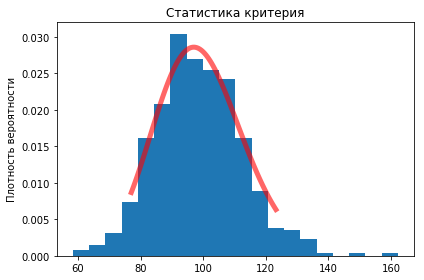

In [8]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(criteria, 20, normed=True)

# plot
x = np.linspace(criterion_dist.ppf(0.05), criterion_dist.ppf(0.95), 100)
ax.plot(x, criterion_dist.pdf(x), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("Статистика критерия")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()

/Users/dedefer/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


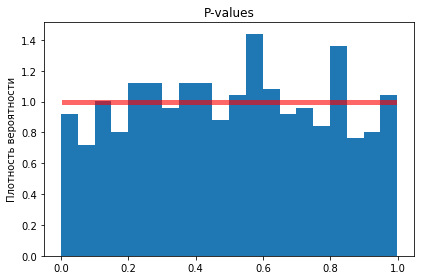

In [9]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(p_values, 20, normed=True)

# plot
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
ax.plot(x, stats.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("P-values")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()